In [10]:
import matplotlib.pyplot as plt
import matplotlib
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # window용 # 안넣으면 한글 깨짐
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 특수기호 (-) 출력
# matplotlib.rcParams['font.family'] = 'AppleGothic'   # Mac용
import pandas as pd
import numpy as np


In [18]:
df = pd.read_csv('chipotle.tsv',sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [21]:

order = df.groupby('item_name')['quantity'].count().head(10)
order

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: quantity, dtype: int64

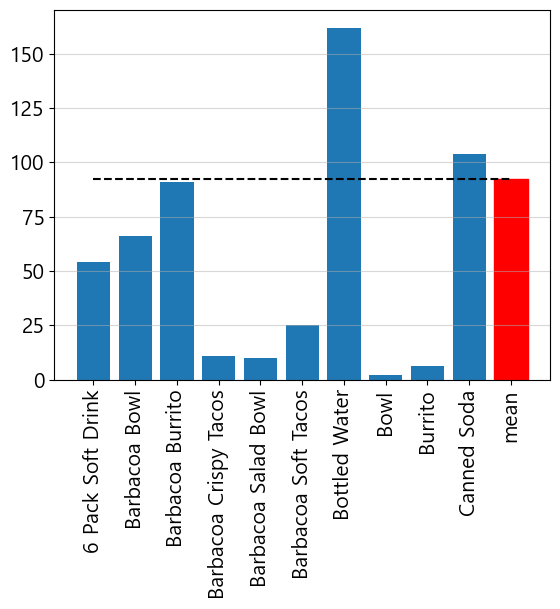

In [41]:
# 쌤이 한건데 주문개수는 order_id가 아니라 quantity 아님? ㅡㅡ

## 메뉴별 주문개수
## 순서상관없이, head(10)로 10개 막대그래프를 출력하시오.
count_df = df.groupby('item_name')['order_id'].count().head(10)
## 평균포함
count_df['mean'] = df.groupby('item_name')['order_id'].count().mean()
count_df.index
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.5)
count_bar = plt.bar(count_df.index,count_df)
count_bar[len(count_df.index)-1].set_color('red')
plt.plot(count_df.index,[count_df.loc['mean']]*len(count_df.index),color='black',ls='--')
plt.show()

KeyError: 'mean'

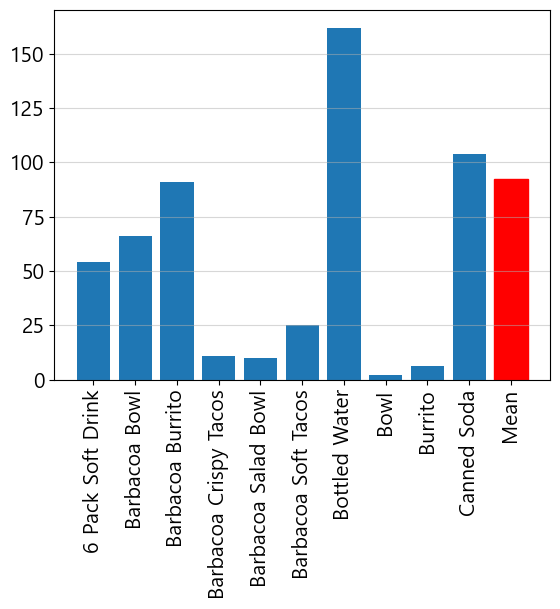

In [40]:
# 메뉴별 주문량 주문개수를 5개만 뽑아서 막대그래프로 출력
# 순서상관없이, head(5) 막대그래프로 출력
# 메뉴별 주문수량 '평균' 컬럼 추가

order = df.groupby('item_name')['quantity'].count().head(10)
# order 에 '평균' 컬럼 추가 = 'Mean'
order['Mean'] = df.groupby('item_name')['quantity'].count().mean()

# 바 그래프 생성
order_bar=plt.bar(order.index,order)
plt.xticks(rotation=90) # 글자 옆으로 눕히기
plt.grid(axis='y', alpha=0.5)
order_bar[len(order.index)-1].set_color('red') # order_bar[len(order.index)] -> 마지막 숫자 번째꺼를 빨갠색으로!

# 선 그래프 생성
plt.plot(order.index,[order.loc['mean']]*len(order.index),color='black',ls='--')
plt.show()
